In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import time
import datetime 
import random
from scipy import stats


from IPython import display

**An online e-commerce company decides to add sales tag to selective products. The sales tag represents that the item is on sales. Based on the observational data, how to measure the effect of adding the sales tag.**

> 1. Define Goal: 
>> The impact of adding sales tag to products.

> 2. Identify Metric: 
>> Average CTR per user

> 3. Develop Hypothesis:
>> The sales tag will drive up the average CTR per user

> 4. Set up the experiemnt:
>> set up the homepage by adding the products with sales tag. we randomly separate users to treatment and control. The unit of analysis is user. This will ensure that consistent user experience to users. This will ensure that our experiment is trustworthy and independent assumption is not violated. 

> 5. Run the Experiment
>> Once the engineer implemented the changes and randomly assigned the users. Let the experiment run for a week. collect the consumer data and prepare the analysis. 

> 6. Analyze the result
>> Conduct T-Test and analyze the result. Since the simulated the data. we should be conculde that treatment will increase the conversion rate from home page to product page.

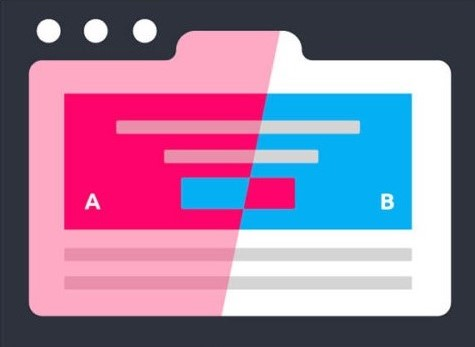

In [2]:
display.Image("AB-Testing-DreamHost-image.jpg",width=600, height=600)

In [3]:
d = {'Living Room Furniture': ['Sofas', 'Sectionals', 'Accent Chairs', 
                               'Coffee Tables', 'TV Stands', 'Chairs', 'Cabinets'], 
    
    'Bedroom Furniture':['Beds', 'Dressers', 'Nightstands', 'Bed Frames', 'Bedroom Sets'], 
    
    'Kitchens': ['Dining Tables', 'Dining Room Sets', 'Var Stools'],
    
    'Office': ['Desks', 'Bookcases', 'Office Chairs', 'Room Dividers'],
    
    'Mudroom':['Console Tables', 'Hall Trees'], 
    
    'Outdoor Furniture': ['Lounge Chairs', 'Patio Dining Sets', 'Porch Swings', 'Hammocks'],
    
    'Outdoor Shades': ['Gazebos', 'Pergolas', 'Canopies'],
    
    'Garden':['Planters', 'Trellises'],
    
    'Bedding':['Comforter', 'Duvet', 'Quilts', 'Blankets'], 
    
    'Ceiling Lighting':['Chandeliers', 'Flush Mount Lighting', 'Track Lighting'], 
    
    'Wall Lights':['Bathroom Vanity Lighting', 'Wall Sconces'], 
    
    'Kitchen Appliances': ['Refrigerators', 'Ranges', 'Mini Fridges', 'Dishwashers'], 
    
    'Washers & Dryers': ['Dryers', 'Washer'], 
    
    'Baby Furniture': ['Cribs', 'Toddler Beds', 'Crib Mattresses']}


df = pd.DataFrame(columns=['timestamp', 'userid', 'item', 'item category', 'price', 'test', 'click'])

In [4]:
current = datetime.datetime.strptime(time.ctime(), "%a %b %d %H:%M:%S %Y")

p_test = 0.03

p_control = 0.02

for i in range(0, 30000):
    
    
    timestamp = current -  datetime.timedelta(days = random.randrange(7),
                                              hours = random.randrange(12),
                                              minutes = random.randrange(30))
    
    userid = 'userid '+ str(random.randint(1, 500000)) 
    
    item_cat, item = random.choice(list(d.items()))
    
    mean_uniform = random.randint(a=30,b=100)
    
    std_uniform = random.randint(a=15, b=30)
    
    price = round(np.random.normal(mean_uniform, std_uniform),2)
    
    item_cat, item = random.choice(list(d.items()))

    item_cat, item = item_cat, random.choice(item)
    
    test = 1 if np.random.uniform() > 0.5 else 0

    temp = [timestamp.strftime("%b %d %Y - %H:%M:%S"), userid, item, item_cat, price, test]

    
    if test == 1:
        click = 1 if np.random.uniform() < p_test else 0
        temp.append(click)
    
    elif test == 0: 
        click = 1 if np.random.uniform() < p_control else 0
        temp.append(click)
        
    df.loc[len(df)] = temp
    

In [5]:
df = df.sort_values('timestamp')
df.reset_index()
df['click'] = pd.to_numeric(df['click'])
df.head()


,timestamp,userid,item,item category,price,test,click
24711,Jan 14 2021 - 02:32:18,userid 258254,Trellises,Garden,83.90,0,0
4075,Jan 14 2021 - 02:32:18,userid 331476,Bathroom Vanity Lighting,Wall Lights,8.91,0,0
11326,Jan 14 2021 - 02:32:18,userid 65658,Sectionals,Living Room Furniture,87.36,1,0
11575,Jan 14 2021 - 02:32:18,userid 402122,Hall Trees,Mudroom,90.84,1,0
21462,Jan 14 2021 - 02:32:18,userid 381169,Dryers,Washers & Dryers,10.30,1,0


In [6]:
test = df.loc[df.test == 1]
control = df.loc[df.test == 0]

In [7]:
test_agg  = test.groupby('userid') \
       .agg({'click':'mean'}).reset_index()

control_agg  = control.groupby('userid') \
       .agg({'click':'mean'}).reset_index()

**We separate the observations into control and test. We also calculate the average click through rate by user. The metric we care about.**

> Next, we should calculate the t stats. and conclude that the observable difference is statistical significant or not.

> Since it is simulated data, we should see the treatment group has a superior experience. However **The key of online experiement is never the statistic we used, the process of setting up an experiemnt that generate trustworthy result.**

In [8]:
test_agg.head()

,userid,click
0,userid 100000,0.0
1,userid 100068,0.0
2,userid 100134,0.0
3,userid 100146,0.0
4,userid 100149,0.0


In [9]:
control_agg.head()

,userid,click
0,userid 100049,0.0
1,userid 100058,0.0
2,userid 100078,0.0
3,userid 100085,0.0
4,userid 100124,1.0


In [10]:
cal_diff = test_agg['click'].mean() - control_agg['click'].mean()
print('The observable difference is',cal_diff, '\n')
t2, p2 = stats.ttest_ind(test_agg['click'],control_agg['click'])
print("t = " + str(t2))
print("p = " + str(p2))

The observable difference is 0.010624256257742593 

t = 5.790787484518671
p = 7.0765622246332e-09
